<a href="https://colab.research.google.com/github/CGproject-record/hrv_heatmap_and_corrplot/blob/main/SI_over_1_heatmap_and_corrplot_20230912%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages('dendextend')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’




In [3]:
install.packages('gplots')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’




corrplot 0.92 loaded



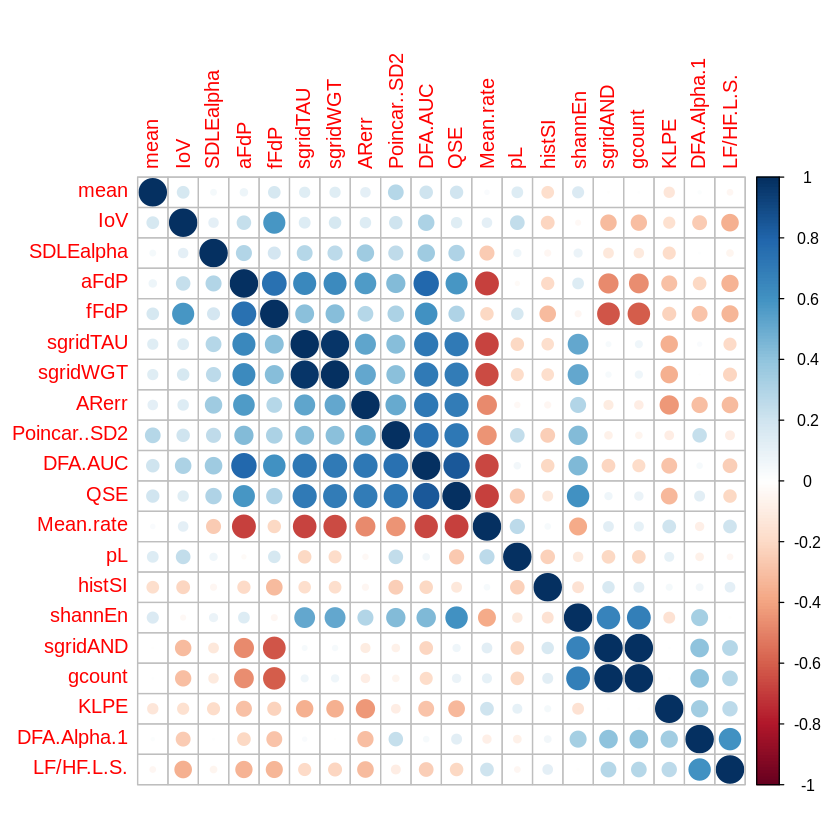

In [4]:

Y<-"si1m"
data <- read.csv('https://raw.githubusercontent.com/CGproject-record/hrv_heatmap_and_corrplot/main/SIover1_top20_data.csv',header = T)
data2 <- data[,-1]

library(stringr)
##====== corplot=======================================
data3<-data2
check<-nchar(names(data2))
names(data3)[check>11][2]<-"LF/HF.L.S."
library(corrplot)
M <- cor(data3)
# corrplot(M, method = "circle")

#  sort corrplot
orderind<-corrMatOrder(M, order = c("hclust"),
                       hclust.method = c("average"))

order_M<-M[orderind,orderind]
corrplot(order_M, method = "circle")


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




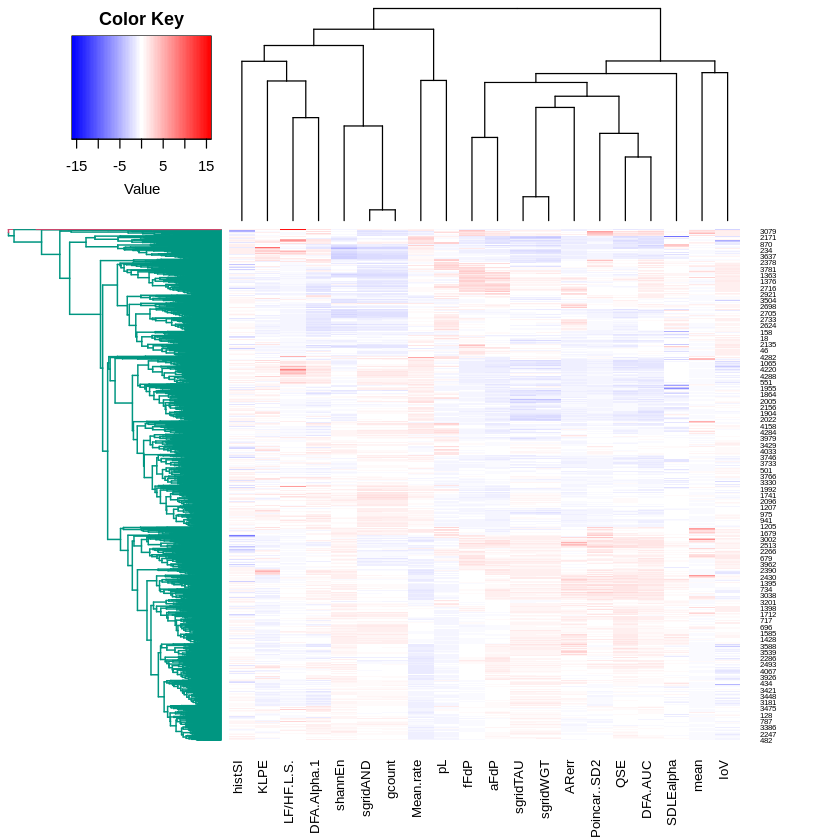

In [5]:
data3<-data2


names(data3)[check>11][2]<-"LF/HF.L.S."
df <- as.matrix((scale(data3)))


library(dendextend)# order for rows
Rowv <- data3 %>% scale %>% dist('manhattan') %>%
  hclust('average') %>% as.dendrogram %>%
  set("branches_k_color", k = 2) %>%
  set("branches_lwd", 1.2) %>% ladderize# Order for columns#


library(gplots)
heatmap.2(df, scale = "none", col = bluered(100), Rowv = Rowv, trace = "none", density.info = "none",cexCol =0.8)



